In [1]:
!pip install spacy
!pip install contextualSpellCheck

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tqdm

import spacy
import contextualSpellCheck

c:\Users\keiko\anaconda3\envs\kaggle_base\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
# Load Prompt (Train)
with open('input/prompts_train.csv', 'r') as f:
    prompt_train = pd.read_csv(f)
    
# Load Summaries (Train)
with open('input/summaries_train.csv', 'r') as f:
    summaries_train = pd.read_csv(f)


In [6]:
summaries_train.head()

,student_id,prompt_id,text,content,wording
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538
1,0020ae56ffbf,ebad26,They would rub it up with soda to make the sme...,-0.548304,0.506755
2,004e978e639e,3b9047,"In Egypt, there were many occupations and soci...",3.128928,4.231226
3,005ab0199905,3b9047,The highest class was Pharaohs these people we...,-0.210614,-0.471415
4,0070c9e7af47,814d6b,The Third Wave developed rapidly because the ...,3.272894,3.219757


In [7]:
n = prompt_train.shape[0]
for i in range(n):
    print(prompt_train['prompt_question'][i])

Summarize at least 3 elements of an ideal tragedy, as described by Aristotle.
In complete sentences, summarize the structure of the ancient Egyptian system of government. How were different social classes involved in this government? Cite evidence from the text.
Summarize how the Third Wave developed over such a short period of time and why the experiment was ended.
Summarize the various ways the factory would use or cover up spoiled meat. Cite evidence in your answer.


In [8]:
summaries_train.head()

,student_id,prompt_id,text,content,wording
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538
1,0020ae56ffbf,ebad26,They would rub it up with soda to make the sme...,-0.548304,0.506755
2,004e978e639e,3b9047,"In Egypt, there were many occupations and soci...",3.128928,4.231226
3,005ab0199905,3b9047,The highest class was Pharaohs these people we...,-0.210614,-0.471415
4,0070c9e7af47,814d6b,The Third Wave developed rapidly because the ...,3.272894,3.219757


## Check missing values and duplicates

In [9]:
summaries_train.isnull().sum()

student_id    0
prompt_id     0
text          0
content       0
wording       0
dtype: int64

In [10]:
summaries_train.duplicated().sum()

0

## See Distributions of data

##### (1) Number of samples for each prompt

In [11]:
summaries_train['prompt_id'].value_counts()

prompt_id
39c16e    2057
3b9047    2009
ebad26    1996
814d6b    1103
Name: count, dtype: int64

##### (2) Histograms of ``content`` and ``wording``

In [12]:
plot_min_score = -2
plot_max_score = 5


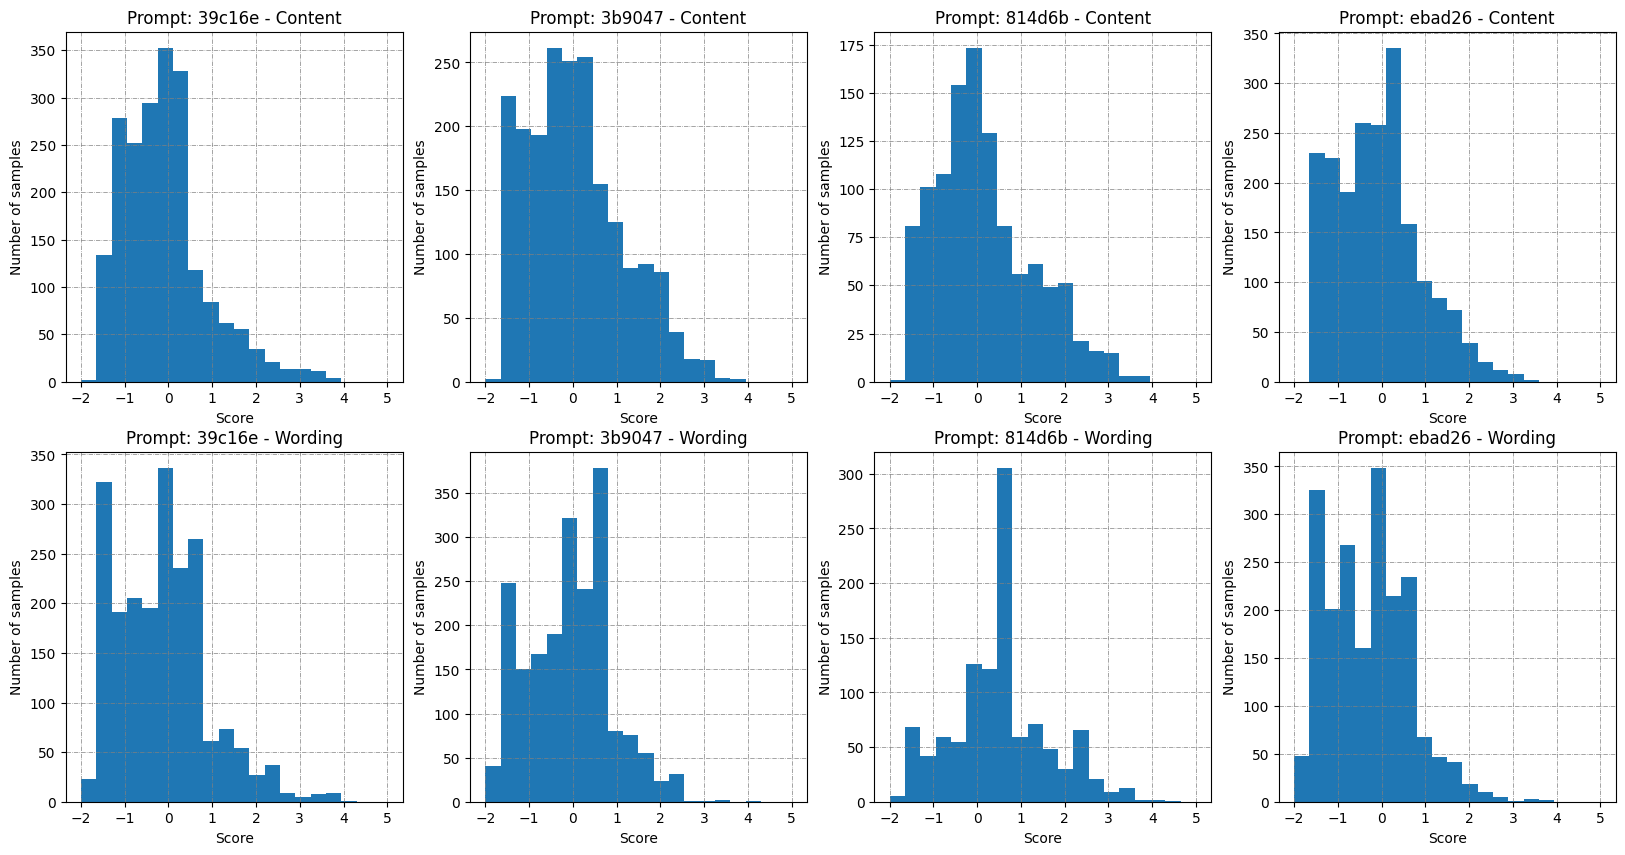

In [13]:
num_prompt = len(prompt_train['prompt_id'])
fig, ax = plt.subplots(2, num_prompt, figsize=(20, 10))

for i in range(num_prompt):
    # Get data for prompt i
    prompt = prompt_train.loc[i,'prompt_id']
    c = summaries_train[summaries_train['prompt_id'] == prompt]['content']
    w = summaries_train[summaries_train['prompt_id'] == prompt]['wording']
    # Plot histogram
    ax[0,i].hist(c, bins=20, range=(plot_min_score, plot_max_score))
    ax[1,i].hist(w, bins=20, range=(plot_min_score, plot_max_score)) 
    # Set title
    ax[0,i].title.set_text('Prompt: ' + str(prompt) + ' - Content')
    ax[1,i].title.set_text('Prompt: ' + str(prompt) + ' - Wording')
    # Set labels
    ax[0,i].set_xlabel('Score')
    ax[0,i].set_ylabel('Number of samples')
    ax[1,i].set_xlabel('Score')
    ax[1,i].set_ylabel('Number of samples')    
    # Grid on
    ax[0,i].grid(color='gray', linestyle='-.', linewidth=0.5)
    ax[1,i].grid(color='gray', linestyle='-.', linewidth=0.5)
    

##### (3) Correlation between `content` and `wording`

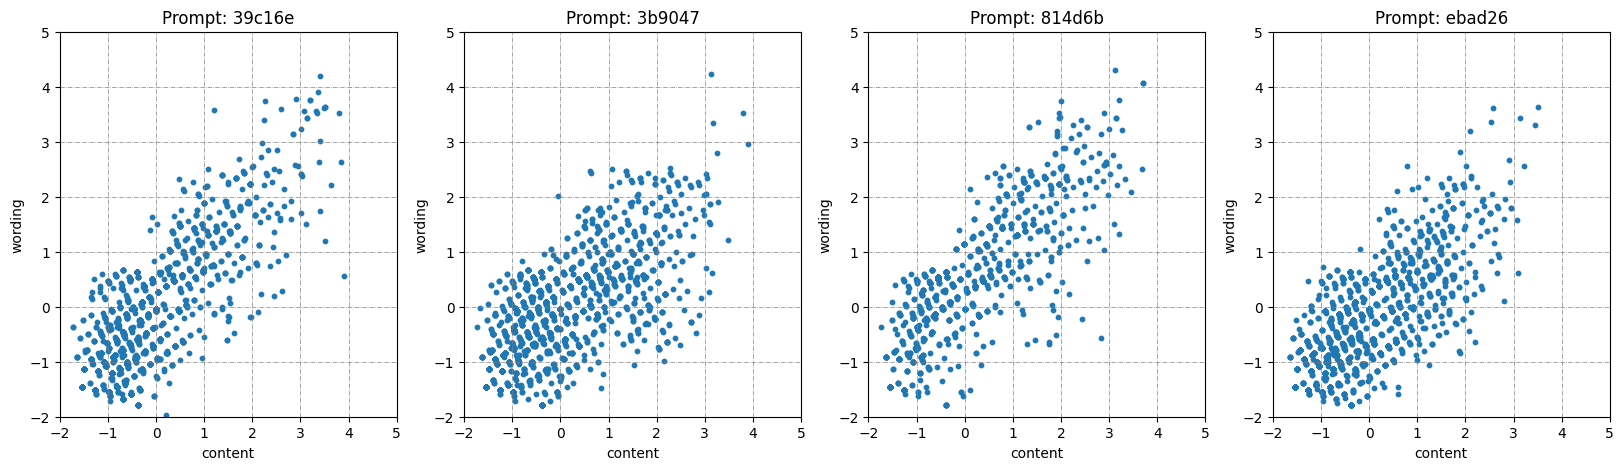

In [14]:
fig, ax = plt.subplots(1, num_prompt, figsize=(20, 5))

for i in range(num_prompt):
    # Get data for prompt i
    prompt = prompt_train.loc[i,'prompt_id']
    c = summaries_train[summaries_train['prompt_id'] == prompt]['content']
    w = summaries_train[summaries_train['prompt_id'] == prompt]['wording']
    # Plot histogram
    ax[i].scatter(c.values, w.values, s = 10)
    # Set title
    ax[i].title.set_text('Prompt: ' + str(prompt))
    # Set labels
    ax[i].set_xlabel('content')
    ax[i].set_ylabel('wording')
    # Grid on
    ax[i].grid(color='gray', linestyle='-.', linewidth=0.5)
    ax[i].set_xlim(plot_min_score, plot_max_score) 
    ax[i].set_ylim(plot_min_score, plot_max_score)

##### (4) Spell Check

In [15]:
!pip install pyspellchecker

In [16]:
from spellchecker import SpellChecker

In [17]:
spell = SpellChecker()

num_sample = summaries_train.shape[0]
count = []
for t in range(num_sample):
    tmp_text = summaries_train['text'][t]
    tmp_text = tmp_text.replace('\n', '')
    tmp_text = tmp_text.replace('.', '')
    tmp_text = tmp_text.replace(',', '')
    tmp_text = tmp_text.replace('?', '')
    tmp_text = tmp_text.replace('!', '')
    tmp_text = tmp_text.replace('(', '')
    tmp_text = tmp_text.replace(')', '')
    tmp_text = tmp_text.replace('-', '')
    tmp_text = tmp_text.replace(':', '')
    tmp_text = tmp_text.replace(';', '')
    tmp_text = tmp_text.replace('"', '')
    tmp_text = tmp_text.replace("'", "")
    tmp_text = tmp_text.replace('`', '')

    misspelled = spell.unknown(tmp_text.split())
    count.append(len(misspelled))
    

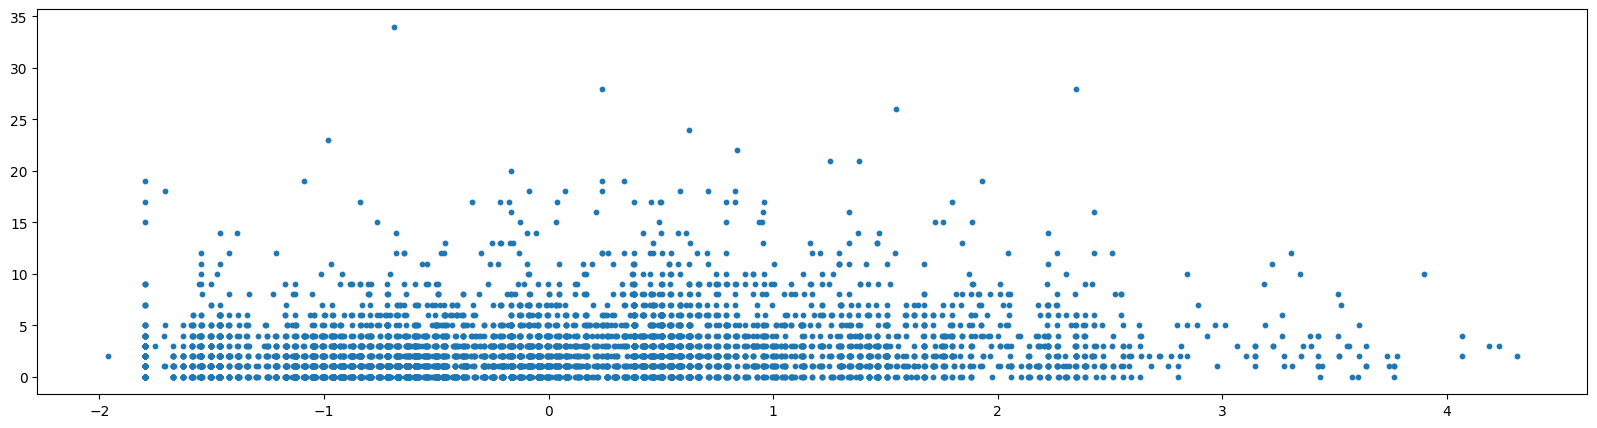

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(20, 5))
ax.scatter(summaries_train['wording'], count, s = 10)

There is no correlation between the number of misspelled words and wording score, which confirms the reply by the host as follows:
> Spelling and grammar mistakes are not part of the rubric used to generate the scores and raters were instructed to ignore these mistakes when grading the summaries.

##### (5) The levels of words

In [20]:
from textblob import TextBlob
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\keiko\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\keiko\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\keiko\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [21]:
with open('input/WordDifficulty.csv', 'r') as f:
    word_difficulty = pd.read_csv(f)

In [333]:
def get_difficulty_score(text_src):

    # Remove capital letters 
    text_src = text_src.lower()

    # Correct spelling
    text_src = TextBlob(text_src)
    text_src = str(text_src.correct())
    token = word_tokenize(text_src)

    # Remove stop words
    text_dst = []
    score = []
    for word in token:
        if word not in stopwords:
            text_dst.append(word)

    # Get scores
    score = []
    for word in text_dst:
        tmp_score = word_difficulty[word_difficulty['Word'] == word]['I_Zscore'].to_list()
        if len(tmp_score) > 0:
            score.append(tmp_score[0])
        else:
            score.append(np.nan)
    
    return np.nanmean(score)

In [341]:
scores = []
for i in tqdm.tqdm(range(num_sample)):
    text = summaries_train['text'][i]
    scores.append(get_difficulty_score(text))

100%|██████████| 7165/7165 [46:44<00:00,  2.55it/s]  


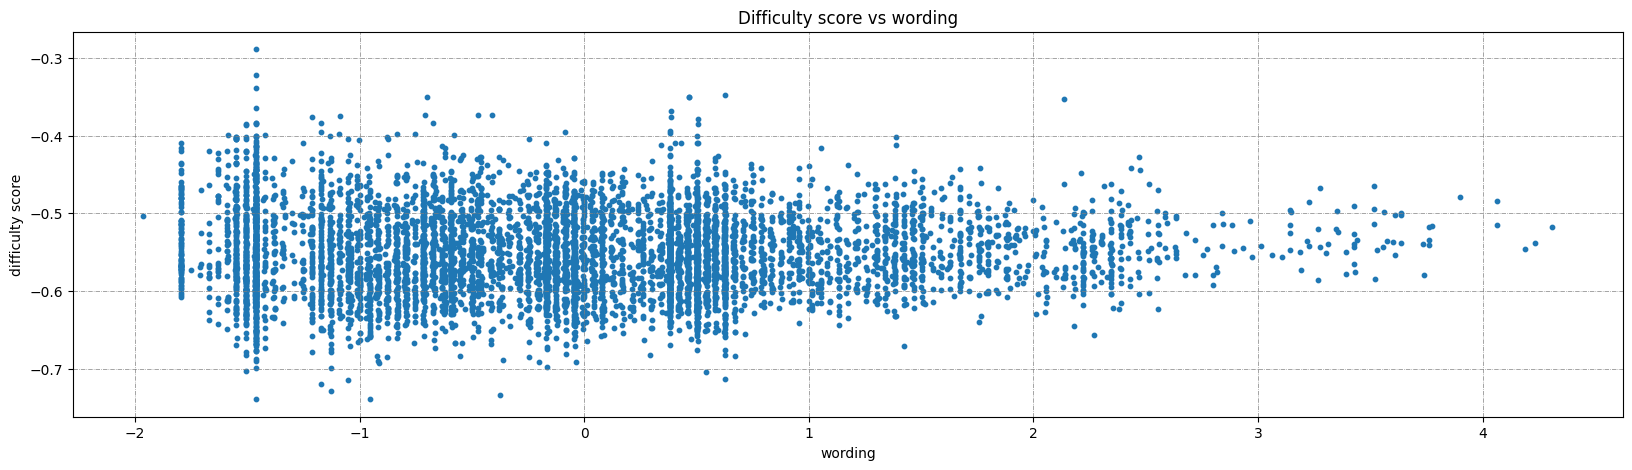

In [344]:
fig, ax = plt.subplots(1, 1, figsize=(20, 5))
ax.scatter(summaries_train['wording'], scores, s = 10)

ax.set_xlabel('wording')
ax.set_ylabel('difficulty score')
ax.grid(color='gray', linestyle='-.', linewidth=0.5)
ax.title.set_text('Difficulty score vs wording')

##### (6) Semantic similarity and the score of `content`

In [22]:
import seaborn as sns
import tensorflow as tf
import tensorflow_hub as hub

In [23]:
model_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model = hub.load(model_url)

def embed(input):
    return model(input)

In [24]:
prompt_train.head()

,prompt_id,prompt_question,prompt_title,prompt_text
0,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \nAs the sequel to what has already...
1,3b9047,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structured like a pyramid...
2,814d6b,Summarize how the Third Wave developed over su...,The Third Wave,Background \nThe Third Wave experiment took pl...
3,ebad26,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an..."


In [25]:
summaries_train.head()

,student_id,prompt_id,text,content,wording
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538
1,0020ae56ffbf,ebad26,They would rub it up with soda to make the sme...,-0.548304,0.506755
2,004e978e639e,3b9047,"In Egypt, there were many occupations and soci...",3.128928,4.231226
3,005ab0199905,3b9047,The highest class was Pharaohs these people we...,-0.210614,-0.471415
4,0070c9e7af47,814d6b,The Third Wave developed rapidly because the ...,3.272894,3.219757


In [34]:
def compute_similarity(feature_query, feature_summary):
    val = np.inner(feature_query, feature_summary)
    return val


def get_similarity_matrix(df_query, df_summary):

    num_query = df_query.shape[0]
    num_summary = df_summary.shape[0]
    df_similarity = pd.DataFrame(columns=['similarity'])
    tmp_mat = np.zeros((num_summary,))

    for i in tqdm.tqdm(range(num_query)):
        prompt_id = df_query['prompt_id'][i]

        for j in range(num_summary):
            if df_summary['prompt_id'][j] == prompt_id:
                feature_query = embed([df_query['prompt_text'][i]])
                feature_summary = embed([df_summary['text'][j]])
                tmp_mat[j] = compute_similarity(feature_query, feature_summary)
    
    df_similarity['similarity'] = tmp_mat
    return df_similarity


In [29]:
df_similarity = get_similarity_matrix(prompt_train, summaries_train)

100%|██████████| 4/4 [00:44<00:00, 11.12s/it]


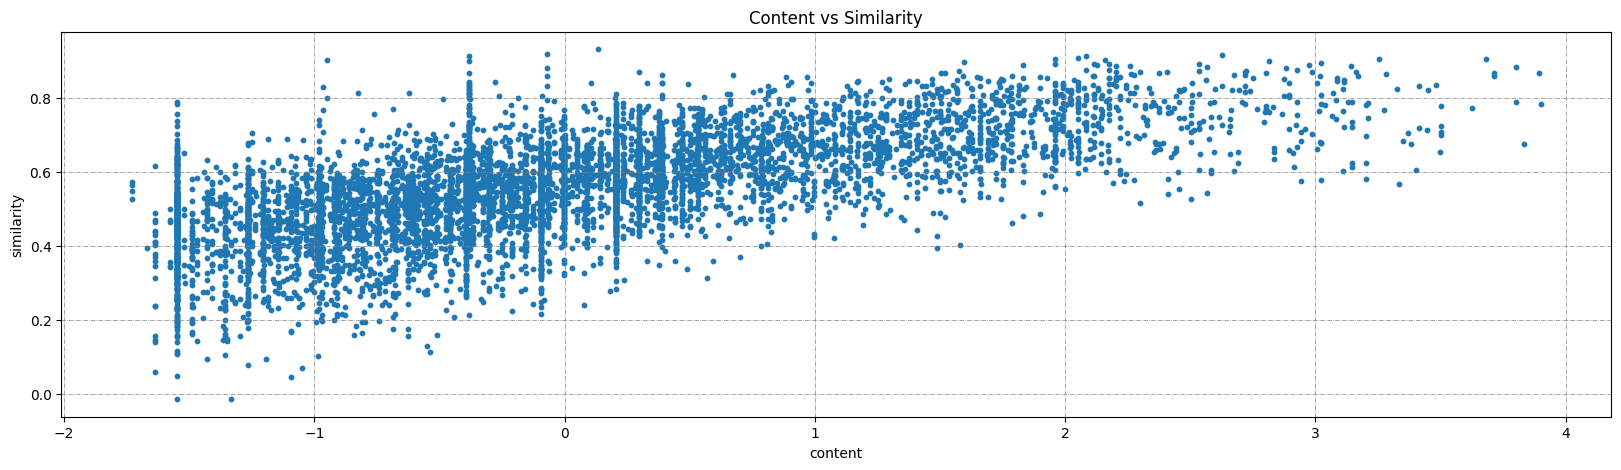

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(20, 5))
ax.scatter(summaries_train['content'], df_similarity['similarity'], s = 10)
ax.title.set_text('Content vs Similarity')
ax.set_xlabel('content')
ax.set_ylabel('similarity')
ax.grid(color='gray', linestyle='-.', linewidth=0.5)

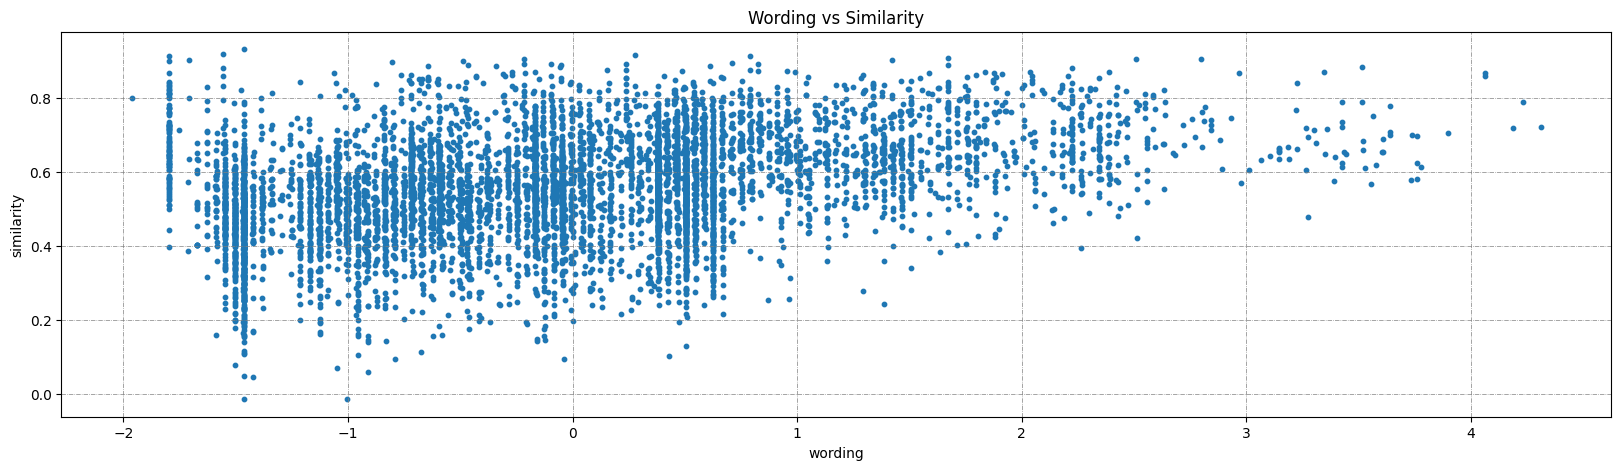

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(20, 5))
ax.scatter(summaries_train['wording'], df_similarity['similarity'], s = 10)
ax.title.set_text('Wording vs Similarity')
ax.set_xlabel('wording')
ax.set_ylabel('similarity')
ax.grid(color='gray', linestyle='-.', linewidth=0.5)


In [37]:
print('corr(content, similarity) = ', np.corrcoef(summaries_train['content'], df_similarity['similarity'])[0,1])
print('corr(wording, similarity) = ', np.corrcoef(summaries_train['wording'], df_similarity['similarity'])[0,1])

corr(content, similarity) =  0.6718080106479719
corr(wording, similarity) =  0.3778884053013265


##### (7) The length of the summary and contents / wording

In [39]:
a = summaries_train['text'][0]

In [41]:
len(a)

346

In [43]:
str_len = np.zeros((num_sample,))
for i in range(num_sample):
    str_len[i] = len(summaries_train['text'][i])

In [59]:
word_count = np.zeros((num_sample,))
for i in range(num_sample):
    word_count[i] = len(summaries_train['text'][i].split())

In [62]:
zscore_word_count = np.zeros((num_sample,))
for i in range(num_prompt):
    prompt = prompt_train['prompt_id'][i]
    rows = summaries_train['prompt_id'] == prompt
    zscore_word_count[rows] = (word_count[rows] - np.mean(word_count[rows])) / np.std(word_count[rows])

In [64]:
zscore_log_word_count = np.zeros((num_sample,))
log_word_count = np.log(word_count)
for i in range(num_prompt):
    prompt = prompt_train['prompt_id'][i]
    rows = summaries_train['prompt_id'] == prompt
    zscore_log_word_count[rows] = (log_word_count[rows] - np.mean(log_word_count[rows])) / np.std(log_word_count[rows])

corr(content, string length) =  0.7972435838178858
corr(content, word counts) =  0.7926262521709247
corr(content, Z-score of word counts) =  0.8617763802056388


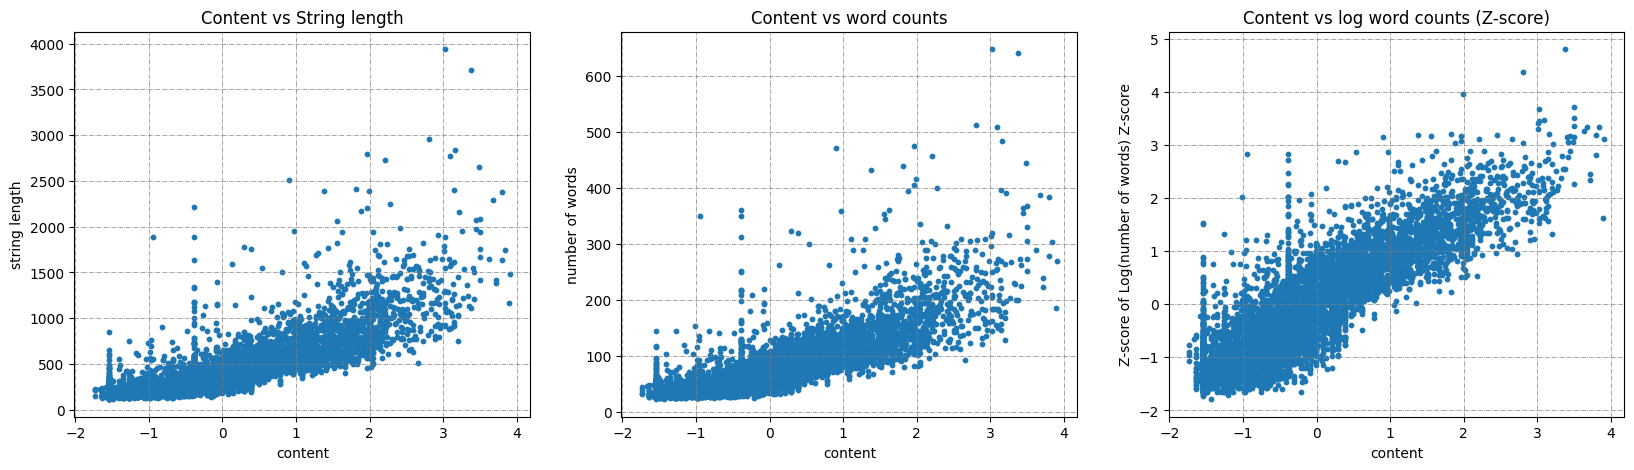

In [65]:
fig, ax = plt.subplots(1,3, figsize=(20, 5))
ax[0].scatter(summaries_train['content'], str_len, s=10)
ax[0].title.set_text('Content vs String length')
ax[0].set_xlabel('content')
ax[0].set_ylabel('string length')
ax[0].grid(color='gray', linestyle='-.', linewidth=0.5)

ax[1].scatter(summaries_train['content'], word_count, s=10)
ax[1].title.set_text('Content vs word counts')
ax[1].set_xlabel('content')
ax[1].set_ylabel('number of words')
ax[1].grid(color='gray', linestyle='-.', linewidth=0.5)

ax[2].scatter(summaries_train['content'], zscore_log_word_count, s=10)
ax[2].title.set_text('Content vs log word counts (Z-score)')
ax[2].set_xlabel('content')
ax[2].set_ylabel('Z-score of Log(number of words) Z-score')
ax[2].grid(color='gray', linestyle='-.', linewidth=0.5)

'''
ax[2].scatter(summaries_train['content'], zscore_word_count, s=10)
ax[2].title.set_text('Content vs word counts (Z-score)')
ax[2].set_xlabel('content')
ax[2].set_ylabel('Z-score of number of words')
ax[2].grid(color='gray', linestyle='-.', linewidth=0.5)
'''

print('corr(content, string length) = ', np.corrcoef(summaries_train['content'], str_len)[0,1])
print('corr(content, word counts) = ', np.corrcoef(summaries_train['content'], word_count)[0,1])
print('corr(content, Z-score of word counts) = ', np.corrcoef(summaries_train['content'], zscore_log_word_count)[0,1])

In [58]:
for i in range(num_prompt):
    prompt_id = prompt_train['prompt_id'][i]
    rows = summaries_train['prompt_id']==prompt_id
    print('Prompt: ', prompt_id, ', number of samples: ', np.sum(rows), '\n', \
            '- avg word count: ', np.mean(word_num[rows]), '\n', \
            '- min_word_count: ', np.min(word_num[rows]), '\n', \
            '- max_word_count: ', np.max(word_num[rows]))

Prompt:  39c16e , number of samples:  2057 
 - avg word count:  62.832766164316965 
 - min_word_count:  22.0 
 - max_word_count:  641.0
Prompt:  3b9047 , number of samples:  2009 
 - avg word count:  83.53160776505725 
 - min_word_count:  24.0 
 - max_word_count:  647.0
Prompt:  814d6b , number of samples:  1103 
 - avg word count:  72.8739800543971 
 - min_word_count:  25.0 
 - max_word_count:  387.0
Prompt:  ebad26 , number of samples:  1996 
 - avg word count:  79.45090180360721 
 - min_word_count:  23.0 
 - max_word_count:  509.0


In [55]:
i = 0
prompt_id = prompt_train['prompt_id'][i]
rows = summaries_train['prompt_id']==prompt_id

word_num[rows].shape

(2057,)